In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bikes.csv')

In [3]:
df

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...,...
186,2011-07-08,28.187490,63.618656,19.761499,692.000000
187,2011-07-09,29.070524,61.346450,21.121738,702.333333
188,2011-07-10,29.953558,59.074244,22.481976,712.666667
189,2011-07-11,30.836592,56.802038,23.842215,723.000000


# Summary Stats:

In [4]:
df.keys()

Index(['date', 'temperature', 'humidity', 'windspeed', 'count'], dtype='object')

In [5]:
df.date

0      2011-01-03
1      2011-01-04
2      2011-01-05
3      2011-01-06
4      2011-01-07
          ...    
186    2011-07-08
187    2011-07-09
188    2011-07-10
189    2011-07-11
190    2011-07-12
Name: date, Length: 191, dtype: object

In [8]:
df.shape

(191, 5)

In [9]:
df.columns

Index(['date', 'temperature', 'humidity', 'windspeed', 'count'], dtype='object')

In [10]:
df.dtypes

date            object
temperature    float64
humidity       float64
windspeed      float64
count          float64
dtype: object

In [12]:
df.isnull().sum()

date           0
temperature    0
humidity       0
windspeed      0
count          0
dtype: int64

# Data Visualization

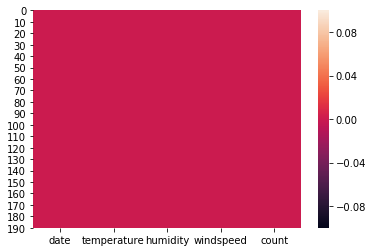

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.describe()

,temperature,humidity,windspeed,count
count,191.000000,191.000000,191.000000,191.000000
mean,15.319033,55.469244,18.605591,461.976440
std,9.876723,7.998748,5.049424,321.669925
min,-2.200000,21.300000,6.941802,9.000000
25%,6.091402,49.593148,14.600733,144.000000
50%,15.769749,55.080463,18.474898,460.000000
75%,24.255189,62.046729,21.621460,740.333333
max,33.113161,72.575560,33.512660,1246.000000


In [15]:
df.drop(['date'],axis=1,inplace=True)
df

,temperature,humidity,windspeed,count
0,2.716070,45.715346,21.414957,120.000000
1,2.896673,54.267219,15.136882,108.000000
2,4.235654,45.697702,17.034578,82.000000
3,3.112643,50.237349,10.091568,88.000000
4,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...
186,28.187490,63.618656,19.761499,692.000000
187,29.070524,61.346450,21.121738,702.333333
188,29.953558,59.074244,22.481976,712.666667
189,30.836592,56.802038,23.842215,723.000000


In [16]:
df.describe()

,temperature,humidity,windspeed,count
count,191.000000,191.000000,191.000000,191.000000
mean,15.319033,55.469244,18.605591,461.976440
std,9.876723,7.998748,5.049424,321.669925
min,-2.200000,21.300000,6.941802,9.000000
25%,6.091402,49.593148,14.600733,144.000000
50%,15.769749,55.080463,18.474898,460.000000
75%,24.255189,62.046729,21.621460,740.333333
max,33.113161,72.575560,33.512660,1246.000000


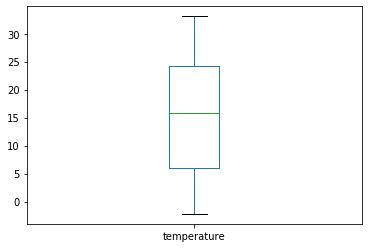

In [18]:
df['temperature'].plot.box()

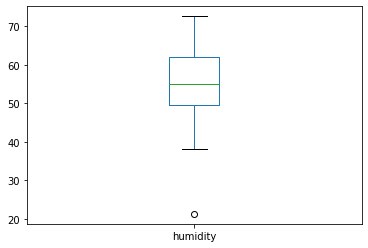

In [19]:
df['humidity'].plot.box()

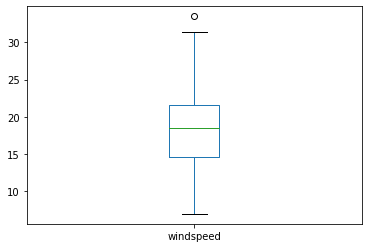

In [20]:
df['windspeed'].plot.box()

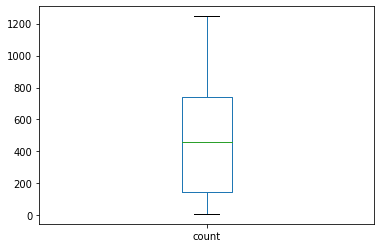

In [21]:
df['count'].plot.box()

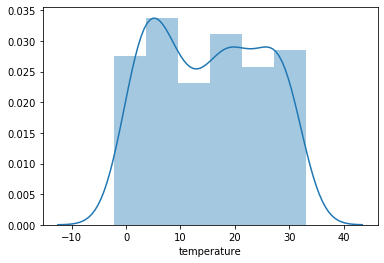

In [22]:
sns.distplot(df['temperature'])

In [24]:
collist=df.columns.values

In [27]:
ncol=4
nrows=10

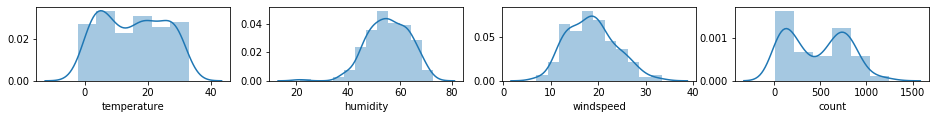

In [28]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

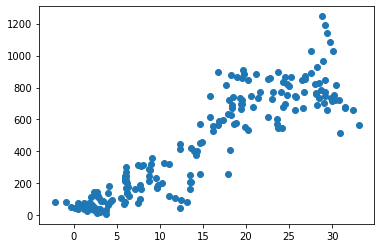

In [30]:
plt.scatter(df['temperature'],df['count'])
plt.show()

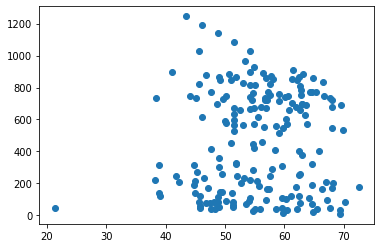

In [31]:
plt.scatter(df['humidity'],df['count'])
plt.show()

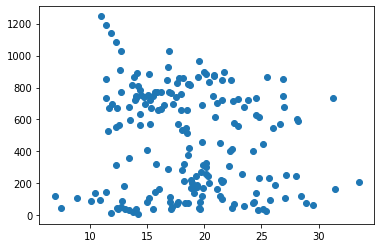

In [33]:
plt.scatter(df['windspeed'],df['count'])
plt.show()

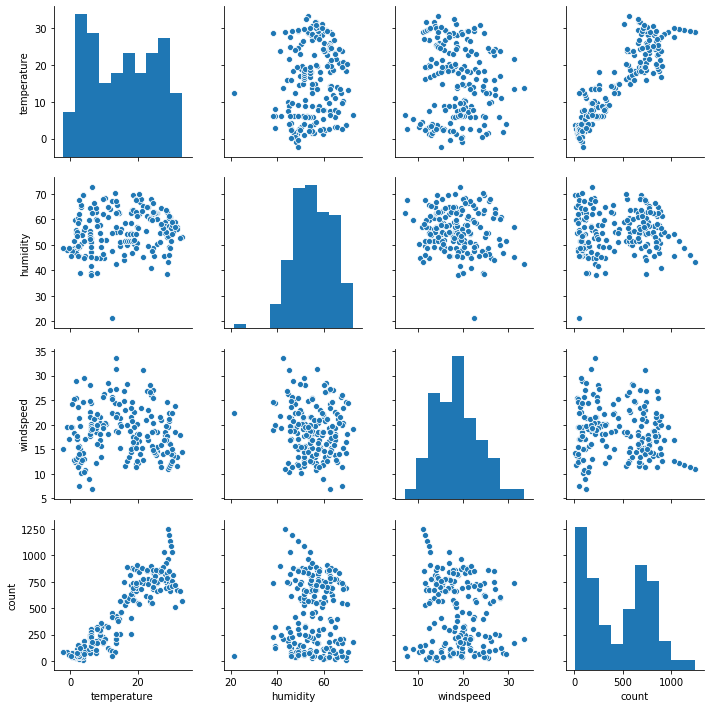

In [34]:
sns.pairplot(df)

# removing outliers:

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.27938042, 1.22263292, 0.55783569, 1.06592246],
       [1.26104657, 0.15067154, 0.68875681, 1.10332582],
       [1.12512099, 1.22484456, 0.3119449 , 1.18436645],
       [1.23912261, 0.65580819, 1.69056887, 1.16566476],
       [1.27858373, 0.79274114, 0.56935655, 0.97864794],
       [1.35537645, 0.82955288, 0.3118552 , 1.08981905],
       [1.43216917, 0.86636462, 0.05435384, 1.20099016],
       [1.50896189, 0.90317636, 0.20314752, 1.31216128],
       [1.41689937, 0.52072335, 1.22930146, 1.30592738],
       [1.39856553, 0.0869118 , 1.35550871, 1.36203243],
       [1.43752746, 0.99066227, 1.30413686, 1.32151212],
       [1.45835221, 0.51887524, 1.16675442, 1.27164096],
       [1.38801575, 0.04775526, 1.09513197, 1.30670662],
       [1.31767929, 0.61438577, 1.02350952, 1.34177227],
       [1.24734283, 1.18101627, 0.95188707, 1.37683793],
       [1.17700638, 1.74764678, 0.88026462, 1.41190358],
       [0.79627659, 0.90828594, 0.00860026, 1.19683423],
       [0.95010237, 0.51532682,

In [47]:
threshold=3
print(np.where(z<3))

(array([  0,   0,   0,   0,   1,   1,   1,   1,   2,   2,   2,   2,   3,
         3,   3,   3,   4,   4,   4,   4,   5,   5,   5,   5,   6,   6,
         6,   6,   7,   7,   7,   7,   8,   8,   8,   8,   9,   9,   9,
         9,  10,  10,  10,  10,  11,  11,  11,  11,  12,  12,  12,  12,
        13,  13,  13,  13,  14,  14,  14,  14,  15,  15,  15,  15,  16,
        16,  16,  16,  17,  17,  17,  17,  18,  18,  18,  18,  19,  19,
        19,  19,  20,  20,  20,  20,  21,  21,  21,  21,  22,  22,  22,
        22,  23,  23,  23,  23,  24,  24,  24,  24,  25,  25,  25,  25,
        26,  26,  26,  26,  27,  27,  27,  27,  28,  28,  28,  28,  29,
        29,  29,  29,  30,  30,  30,  30,  31,  31,  31,  31,  32,  32,
        32,  32,  33,  33,  33,  33,  34,  34,  34,  34,  35,  35,  35,
        35,  36,  36,  36,  36,  37,  37,  37,  37,  38,  38,  38,  38,
        39,  39,  39,  39,  40,  40,  40,  40,  41,  41,  41,  41,  42,
        42,  42,  42,  43,  43,  43,  43,  44,  44,  44,  44,  

In [49]:
df.describe()

,temperature,humidity,windspeed,count
count,191.000000,191.000000,191.000000,191.000000
mean,15.319033,55.469244,18.605591,461.976440
std,9.876723,7.998748,5.049424,321.669925
min,-2.200000,21.300000,6.941802,9.000000
25%,6.091402,49.593148,14.600733,144.000000
50%,15.769749,55.080463,18.474898,460.000000
75%,24.255189,62.046729,21.621460,740.333333
max,33.113161,72.575560,33.512660,1246.000000


# correlation

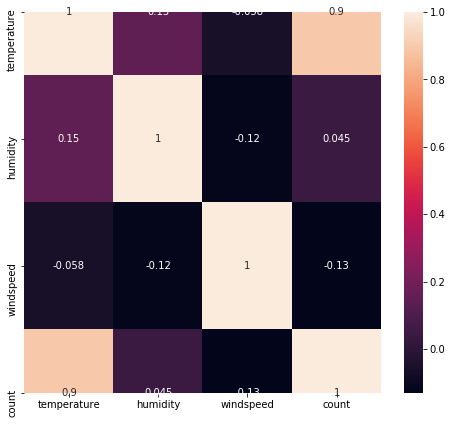

In [39]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

# Now Training

In [42]:
x=df.iloc[:,0:-1]
x.head()

,temperature,humidity,windspeed
0,2.716070,45.715346,21.414957
1,2.896673,54.267219,15.136882
2,4.235654,45.697702,17.034578
3,3.112643,50.237349,10.091568
4,2.723918,49.144928,15.738204


In [43]:
y=df.iloc[:,-1]
y.head()

0    120.0
1    108.0
2     82.0
3     88.0
4    148.0
Name: count, dtype: float64

In [44]:
x.shape

(191, 3)

In [45]:
y.shape

(191,)

In [58]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=45)

In [59]:
df.describe()

,temperature,humidity,windspeed,count
count,191.000000,191.000000,191.000000,191.000000
mean,15.319033,55.469244,18.605591,461.976440
std,9.876723,7.998748,5.049424,321.669925
min,-2.200000,21.300000,6.941802,9.000000
25%,6.091402,49.593148,14.600733,144.000000
50%,15.769749,55.080463,18.474898,460.000000
75%,24.255189,62.046729,21.621460,740.333333
max,33.113161,72.575560,33.512660,1246.000000


In [60]:
x_train.shape

(127, 3)

In [61]:
y_train.shape

(127,)

In [62]:
x_test.shape

(64, 3)

In [63]:
y_test.shape

(64,)

In [64]:
lm=LinearRegression()

In [65]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
lm.coef_

array([277.77450073, -34.12722484, -25.93000403])

In [67]:
lm.intercept_

457.27494032409174

In [68]:
df.columns

Index(['temperature', 'humidity', 'windspeed', 'count'], dtype='object')

In [70]:
lm.score(x_train,y_train)

0.8070421369831072

# Now predict the values

In [71]:
pred=lm.predict(x_test)
print('Predicted_value:',pred)
print('actual_value:',y_test)

Predicted_value: [179.29564831  96.82955759 545.59754215 721.16809436 534.44685638
 845.56537931 100.05521121 550.89708857 631.30780828 806.72787416
 853.7716947  603.94893384 821.14303575 764.320659   237.23700251
 808.93186397 355.89938524 689.58229583 458.91661227 185.07177841
 231.78711358 269.9049978   57.95874668 924.08141438 844.63367973
 647.58891812 929.38494295 129.15607034 918.7778858  583.6451566
 455.07178135 498.55493226 476.0716784  339.8178167  171.46883606
  90.08574591 343.80550933 301.90425764 558.9372895  183.62375219
 595.80654665 166.93134918 101.23972931 445.57107897 756.52729252
 567.15473484  65.95921534 301.22300818 314.61808894 708.88300574
 623.83279617 308.3147454  843.70008926 234.49663986 298.53179326
 851.13540114 478.30602887 828.91594202 211.15439046 896.71307452
 143.93445526 703.81574524 776.2915475   96.73205611]
actual_value: 3       88.000000
13      31.500000
102    564.000000
141    659.000000
134    678.000000
          ...    
147    722.50000

In [72]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df

,Actual,Predicted
3,88.000000,179.295648
13,31.500000,96.829558
102,564.000000,545.597542
141,659.000000,721.168094
134,678.000000,534.446856
...,...,...
147,722.500000,896.713075
4,148.000000,143.934455
168,699.000000,703.815745
160,847.000000,776.291548


In [73]:
print('error:')
print(mean_squared_error(y_test,pred))

error:
18804.3362869889


In [75]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8365029257195504


# Now predicting the New count by providing the New values

In [76]:
t=np.array([2.716070,45.715346,21.414957])
t.shape

(3,)

In [80]:
t=t.reshape(1,-1)

In [81]:
t.shape

(1, 3)

In [82]:
lm.predict(t)

array([-903.69788437])

In [83]:
t=np.array([3.716070,40.715346,23.414957])

In [84]:
t.shape

(3,)

In [85]:
t=t.reshape(1,-1)

In [86]:
t.shape

(1, 3)

In [87]:
lm.predict(t)

array([-507.14726749])